# Forest Fires in Brazil

### Display Top 5 Rows of The Dataset

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

amazon = pd.read_csv('amazon.csv', encoding='iso-8859-1', parse_dates=['date'])
amazon.head(5)

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


### Check Last 5 Rows

In [2]:
amazon.tail(5)

,year,state,month,number,date
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01
6453,2016,Tocantins,Dezembro,119.0,2016-01-01


### Find Shape of Our Dataset (Number of Rows And Number of Columns)

In [3]:
amazon.shape

(6454, 5)

### Getting Information About Dataset

In [4]:
amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    6454 non-null   int64  
 1   state   6454 non-null   object 
 2   month   6454 non-null   object 
 3   number  6454 non-null   float64
 4   date    6454 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 252.2+ KB


In [5]:
amazon.describe()

,year,number
count,6454.000000,6454.000000
mean,2007.461729,108.293163
std,5.746654,190.812242
min,1998.000000,0.000000
25%,2002.000000,3.000000
50%,2007.000000,24.000000
75%,2012.000000,113.000000
max,2017.000000,998.000000


### Check For Duplicate Data and Drop Them

In [6]:
amazon[~amazon.duplicated()]

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01
...,...,...,...,...,...
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01


### Check Null Values In The Dataset

In [7]:
amazon.isna().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

In [8]:
amazon.isna()

,year,state,month,number,date
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
6449,False,False,False,False,False
6450,False,False,False,False,False
6451,False,False,False,False,False
6452,False,False,False,False,False


### Rename Month Names To English

In [9]:
amazon.month.unique()

array(['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho',
       'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'],
      dtype=object)

In [40]:
change_month = {
    'Janeiro': 'January',
    'Fevereiro': 'February',
    'Março': 'March',
    'Abril': 'April',
    'Maio': 'May',
    'Junho': 'June',
    'Julho': 'July',
    'Agosto': 'August',
    'Setembro': 'September',
    'Outubro': 'October',
    'Novembro': 'November',
    'Dezembro': 'December'
}

amazon['month'] = amazon['month'].map(change_month)
amazon

,year,state,month,number,date
0,1998,Acre,January,0.0,1998-01-01
1,1999,Acre,January,0.0,1999-01-01
2,2000,Acre,January,0.0,2000-01-01
3,2001,Acre,January,0.0,2001-01-01
4,2002,Acre,January,0.0,2002-01-01
...,...,...,...,...,...
6449,2012,Tocantins,December,128.0,2012-01-01
6450,2013,Tocantins,December,85.0,2013-01-01
6451,2014,Tocantins,December,223.0,2014-01-01
6452,2015,Tocantins,December,373.0,2015-01-01


### Total Number of Fires Registered

In [11]:
len(amazon)

6454

### In Which Month Maximum Number of Forest Fires Were Reported?

In [12]:
amazon.groupby('month')['number'].sum()

month
April        28188.770
August       88050.435
December     57535.480
February     30848.050
January      47747.844
July         92326.113
June         56010.675
March        30717.405
May          34731.363
November     85508.054
October      88681.579
September    58578.305
Name: number, dtype: float64

<Axes: xlabel='month'>

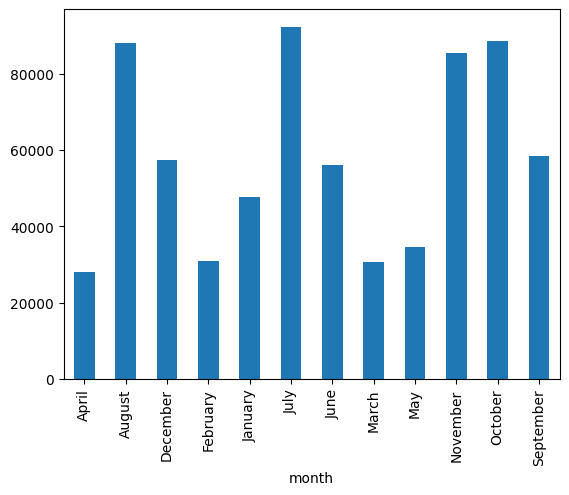

In [13]:
amazon.groupby('month')['number'].sum().plot(kind='bar')

### In Which Year Maximum Number of Forest Fires Was Reported?

In [14]:
amazon.groupby('year')['number'].sum()

year
1998    20013.971
1999    26882.821
2000    27351.251
2001    29071.612
2002    37390.600
2003    42760.674
2004    38453.163
2005    35004.965
2006    33832.161
2007    33037.413
2008    29378.964
2009    39117.178
2010    37037.449
2011    34633.545
2012    40084.860
2013    35146.118
2014    39621.183
2015    41208.292
2016    42212.229
2017    36685.624
Name: number, dtype: float64

<Axes: ylabel='year'>

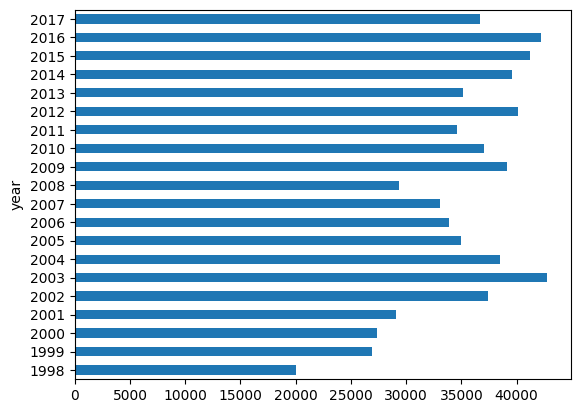

In [15]:
amazon.groupby('year')['number'].sum().plot(kind='barh')

<Axes: ylabel='year'>

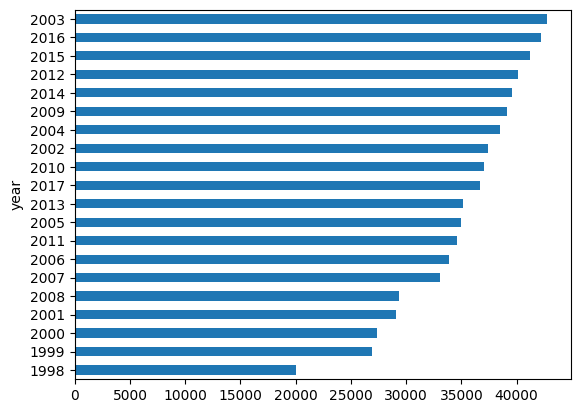

In [16]:
amazon.groupby('year')['number'].sum().sort_values().plot(kind='barh')

### In Which State Maximum Number of Forest Fires Was Reported?

In [47]:
len(amazon['state'].unique())

23

In [17]:
amazon.groupby('state')['number'].sum()

state
Acre                18464.030
Alagoas              4644.000
Amapa               21831.576
Amazonas            30650.129
Bahia               44746.226
Ceara               30428.063
Distrito Federal     3561.000
Espirito Santo       6546.000
Goias               37695.520
Maranhao            25129.131
Mato Grosso         96246.028
Minas Gerais        37475.258
Paraiba             52435.918
Pará                24512.144
Pernambuco          24498.000
Piau                37803.747
Rio                 45160.865
Rondonia            20285.429
Roraima             24385.074
Santa Catarina      24359.852
Sao Paulo           51121.198
Sergipe              3237.000
Tocantins           33707.885
Name: number, dtype: float64

<Axes: xlabel='state'>

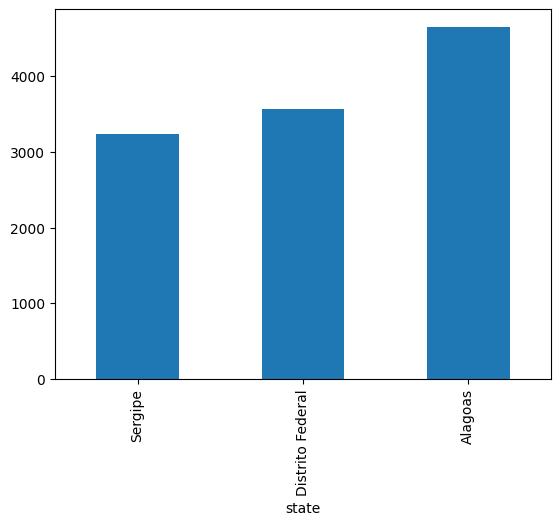

In [18]:
# Find top 3 states with highest forest fire case
amazon.groupby('state')['number'].sum().sort_values().head(3).plot(kind='bar')

### Find Total Number of Fires Were Reported In Amazonas

In [19]:
amazon.groupby('state')['number'].sum()['Amazonas']

30650.129

### Display Number of Fires Were Reported In Amazonas (Day-Wise)

In [29]:
amazonas = amazon[amazon['state'] == 'Amazonas']

amazonas

,year,state,month,number,date
718,1998,Amazonas,Janeiro,0.0,1998-01-01
719,1999,Amazonas,Janeiro,3.0,1999-01-01
720,2000,Amazonas,Janeiro,7.0,2000-01-01
721,2001,Amazonas,Janeiro,3.0,2001-01-01
722,2002,Amazonas,Janeiro,17.0,2002-01-01
...,...,...,...,...,...
952,2012,Amazonas,Dezembro,80.0,2012-01-01
953,2013,Amazonas,Dezembro,236.0,2013-01-01
954,2014,Amazonas,Dezembro,293.0,2014-01-01
955,2015,Amazonas,Dezembro,565.0,2015-01-01


In [32]:
day = amazonas.groupby(amazonas['date'].dt.dayofweek)['number'].sum().reset_index()

import calendar
day.date = [calendar.day_name[x] for x in range(7)]

day

,date,number
0,Monday,1886.601
1,Tuesday,6474.217
2,Wednesday,3910.177
3,Thursday,5754.802
4,Friday,5446.480
5,Saturday,4162.666
6,Sunday,3015.186


<Axes: xlabel='date', ylabel='number'>

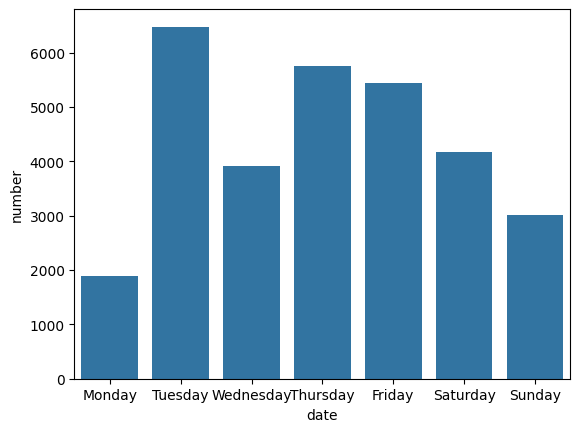

In [36]:
sns.barplot(data=day, x='date', y='number')

### Find Total Number of Fires Were Reported In 2015 And Visualize Data Based on Each Month

In [41]:
forest_fire_2015 = amazon[amazon['year'] == 2015]
forest_fire_2015

,year,state,month,number,date
17,2015,Acre,January,1.000,2015-01-01
37,2015,Acre,February,2.000,2015-01-01
57,2015,Acre,March,2.000,2015-01-01
77,2015,Acre,April,3.000,2015-01-01
97,2015,Acre,May,2.000,2015-01-01
...,...,...,...,...,...
6372,2015,Tocantins,August,2.540,2015-01-01
6392,2015,Tocantins,September,5.510,2015-01-01
6412,2015,Tocantins,October,4.844,2015-01-01
6432,2015,Tocantins,November,833.000,2015-01-01


In [48]:
len(forest_fire_2015)

324

In [51]:
monthly_forest_fire_2015 = forest_fire_2015.groupby('month')['number'].sum().reset_index()
monthly_forest_fire_2015

,month,number
0,April,2573.000
1,August,4363.125
2,December,4088.522
3,February,2309.000
4,January,4635.000
5,July,4364.392
6,June,3260.552
7,March,2202.000
8,May,2384.000
9,November,4034.518


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'April'),
  Text(1, 0, 'August'),
  Text(2, 0, 'December'),
  Text(3, 0, 'February'),
  Text(4, 0, 'January'),
  Text(5, 0, 'July'),
  Text(6, 0, 'June'),
  Text(7, 0, 'March'),
  Text(8, 0, 'May'),
  Text(9, 0, 'November'),
  Text(10, 0, 'October'),
  Text(11, 0, 'September')])

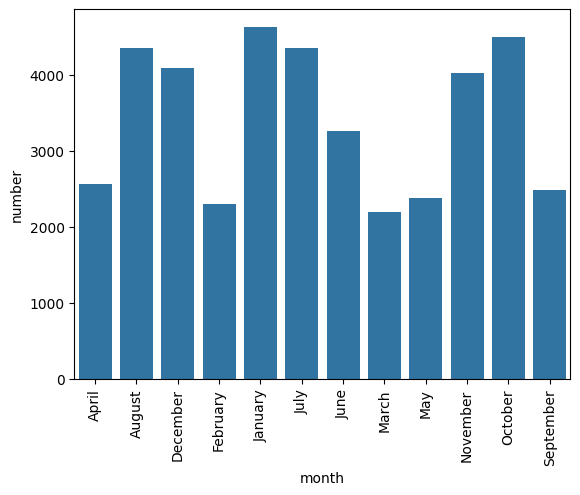

In [57]:
sns.barplot(data=monthly_forest_fire_2015, x='month', y='number')
plt.xticks(rotation=90)

### Find The State Names Where Fires Were Reported In December

In [44]:
state_dec = amazon[amazon['month'] == 'December'].state.unique()
state_dec

array(['Acre', 'Alagoas', 'Amapa', 'Amazonas', 'Bahia', 'Ceara',
       'Distrito Federal', 'Espirito Santo', 'Goias', 'Maranhao',
       'Mato Grosso', 'Minas Gerais', 'Pará', 'Paraiba', 'Pernambuco',
       'Piau', 'Rio', 'Rondonia', 'Roraima', 'Santa Catarina',
       'Sao Paulo', 'Sergipe', 'Tocantins'], dtype=object)

In [45]:
len(state_dec)

23